# Data Cleaning Workshop
Now it's your turn! Apply what you just learned to a simple dataset and practice cleaning.

This café dataset has 8 columns with missing values and other errors for you to hone your data cleaning skills.

Link: https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training

In [1]:
import pandas as pd

df = pd.read_csv("dirty_cafe_sales.csv")
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [2]:
# Find null values
df.isnull().sum()

# Remove null values
df_cleaned = df.dropna()

# Check for null values
print(df_cleaned.isnull().sum())

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


In [3]:
df_cleaned.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,4550,4550,4550,4550,4550,4550,4550,4550
unique,4550,10,7,8,19,5,4,367
top,TXN_6170729,Juice,5,3.0,6.0,Digital Wallet,Takeaway,ERROR
freq,1,569,923,1139,464,1443,2041,68


In [4]:
def tonumeric(name):
  df_cleaned[name] = df_cleaned[name].replace('[a-zA-z]', '', regex=True).replace('', '0').astype(float)
  print(df_cleaned[name].unique())


In [12]:
tonumeric('Total Spent')
tonumeric('Price Per Unit')
tonumeric('Quantity')

# run this twice


[ 4.  12.   0.  10.  20.  16.  15.  25.   8.   5.   6.   nan  2.   9.
  3.   1.   7.5  4.5  1.5]
[2.  3.  1.  5.  4.  1.5 nan 0. ]
[ 2.  4.  5.  3.  1.  0. nan]


/tmp/ipython-input-14116/2688614991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[name] = df_cleaned[name].replace('[a-zA-z]', '', regex=True).replace('', '0').astype(float)
/tmp/ipython-input-14116/2688614991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[name] = df_cleaned[name].replace('[a-zA-z]', '', regex=True).replace('', '0').astype(float)
/tmp/ipython-input-14116/2688614991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [6]:
df_cleaned = df[~df['Item'].isin(['UNKNOWN', 'ERROR'])]
df_cleaned['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Sandwich', nan,
       'Juice', 'Tea'], dtype=object)

In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9364 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    9364 non-null   object
 1   Item              9031 non-null   object
 2   Quantity          9240 non-null   object
 3   Price Per Unit    9199 non-null   object
 4   Total Spent       9206 non-null   object
 5   Payment Method    6952 non-null   object
 6   Location          6315 non-null   object
 7   Transaction Date  9215 non-null   object
dtypes: object(8)
memory usage: 658.4+ KB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Total Price by Cafe')

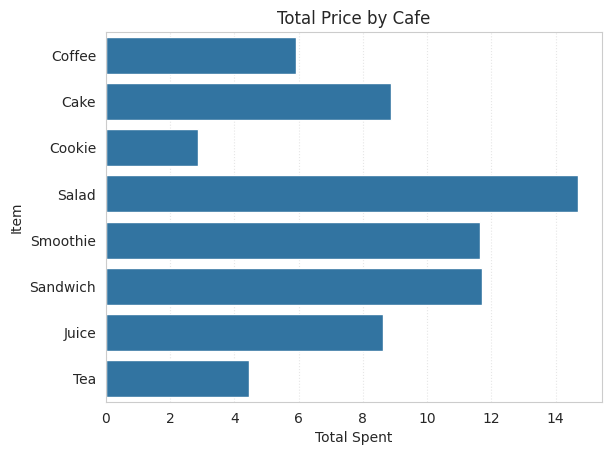

In [13]:
sns.barplot(df_cleaned, x="Total Spent", y="Item", errorbar=None, orient='h').set_title("Total Price by Cafe")

Text(0.5, 1.0, 'Total Price by Cafe Item')

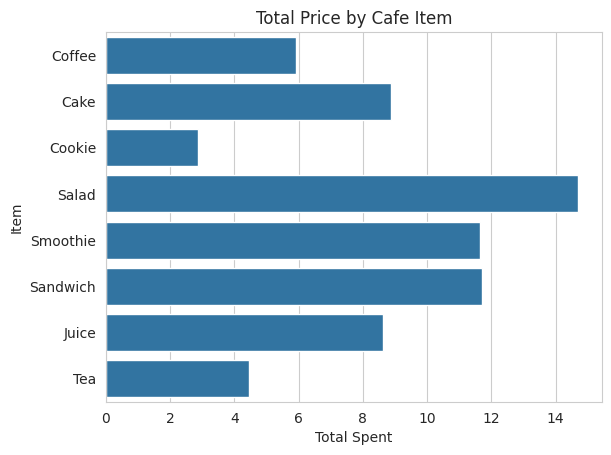

In [14]:
sns.set_style("whitegrid")
sns.barplot(df_cleaned, x="Total Spent", y="Item", errorbar=None, orient='h').set_title("Total Price by Cafe Item")


Text(0.5, 1.0, 'Total Price by Cafe Item')

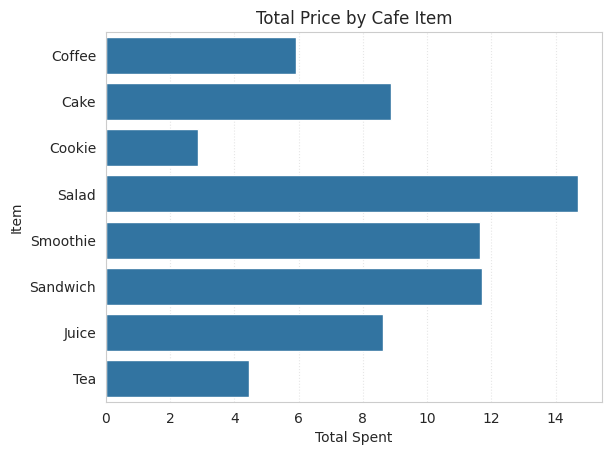

In [15]:
sns.set_style("whitegrid", {"grid.color": ".9", "grid.linestyle": ":"})
sns.barplot(df_cleaned, x="Total Spent", y="Item", errorbar=None, orient='h').set_title("Total Price by Cafe Item")
